<a href="https://colab.research.google.com/github/NguyenDacCuong2604/ML/blob/main/Project_Shipping_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. ***Import Libraries and Connect Drive***

In [1]:
#Connect drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [42]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from prettytable import PrettyTable

#2. ***Load dataset***

In [3]:
#Load dataset
dataSet = pd.read_csv("shipping_ecommerce.csv")
#Lấy 5 dữ liệu đầu tiên
print(dataSet.head())

   Customer_care_calls  Customer_rating  Prior_purchases  Discount_offered  \
0                    5                4                2                10   
1                    4                3                2                 6   
2                    3                4                2                 2   
3                    3                1                2                27   
4                    7                5                4                 9   

   Weight_in_gms Warehouse_block Mode_of_Shipment Product_importance Gender  \
0           5395               A             Ship             medium      M   
1           5867               F             Ship             medium      F   
2           5957               D             Ship             medium      M   
3           2551               D             Ship             medium      M   
4           1329               B             Ship             medium      M   

   Class  
0      1  
1      0  
2      0  
3      1  
4

#3. ***Meta information of Dataframe***

In [4]:
#Thông tin các thuộc tính của dữ liệu
print(dataSet.columns)

Index(['Customer_care_calls', 'Customer_rating', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Warehouse_block',
       'Mode_of_Shipment', 'Product_importance', 'Gender', 'Class'],
      dtype='object')


#Các thuộc tính của dữ liệu:
#1.Customer_care_calls là số lần khách hàng đã gọi đến bộ phận chăm sóc khách hàng để yêu cầu hỗ trợ hoặc giải quyết các vấn đề liên quan đến đơn hàng của họ.
#2.Customer_rating là đánh giá của khách hàng cho dịch vụ vận chuyển.
#3.Prior_purchases là số lượng sản phẩm khách hàng mua từ trước đến nay.
#4.Discount_offered là mức giảm giá được cung cấp cho khách hàng.
#5.Weight_in_gms là trọng lượng của sản phẩm được vận chuyển trong đơn hàng, được tính bằng đơn vị gram.
#6.Warehouse_block là khu vực lưu trữ sản phẩm trong kho.
#7.Mode_of_Shipment là phương thức vận chuyển được sử dụng để giao hàng cho khách hàng.
#8.Product_importance là độ quan trọng của sản phẩm.
#9.Gender là giới tính của khách hàng.
#10.Class là giao đúng hạn. 1-có, 0-không.

In [5]:
#Thông tin về tập dữ liệu:
print(dataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10998 non-null  int64 
 1   Customer_rating      10998 non-null  int64 
 2   Prior_purchases      10998 non-null  int64 
 3   Discount_offered     10998 non-null  int64 
 4   Weight_in_gms        10998 non-null  int64 
 5   Warehouse_block      10998 non-null  object
 6   Mode_of_Shipment     10998 non-null  object
 7   Product_importance   10998 non-null  object
 8   Gender               10998 non-null  object
 9   Class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB
None


Dữ liệu gồm có 10998 mẫu dữ liệu, và không có thuộc tính nào bị null nên không cần xử lý "dữ liệu missing" cho tập dữ liệu

In [6]:
#Mô tả về tập dữ liệu
dataSet.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


#4. ***EDA & Visualization***

#Phân tích và trực quan hóa dữ liệu shipping_ecommerce

In [7]:
#Thống kê số lần xuất hiện của thuộc tính Product_importance(Độ quan trọng của sản phẩm)
fig = px.histogram(data_frame=dataSet, x=dataSet["Product_importance"])
fig.show()

In [8]:
#Phân bố số lượng lần gọi dịch vụ chăm sóc khách hàng theo giới tính và mức độ quan trọng của sản phẩm (Khi đưa chuột vào 1 thành phần sẽ hiện thông tin giới tính, mức độ quan trọng của sản phẩm và tổng số lần khách hàng đã gọi)
fig = px.histogram(dataSet, x="Gender", y="Customer_care_calls", color="Gender", pattern_shape="Product_importance",color_discrete_sequence=["#87CEFA", "#FFA07A"])
fig.show()

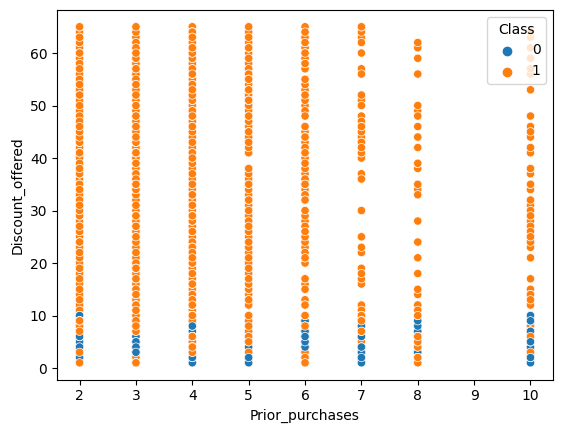

In [9]:
#Biểu đồ trực quan hóa mối quan hệ giữa số lần mua hàng trước đó ("Prior_purchases") và mức giảm giá được đưa ra ("Discount_offered") trong dữ liệu, và kiểm tra xem có sự phân bố hoặc tương quan nào giữa hai biến số này không.
sns.scatterplot(data=dataSet, x='Prior_purchases', y='Discount_offered', hue='Class')
plt.show()

In [10]:
#Phân bố số lượng lần gọi dịch vụ chăm sóc khách hàng theo giới tính và có giao hàng đúng hạn không(Khi đưa chuột vào 1 thành phần sẽ hiện thông tin giới tính, có giao hạn đúng hạn không và tổng số lần khách hàng đã gọi)
fig = px.histogram(dataSet, x="Gender", y="Customer_care_calls", color="Gender", pattern_shape="Class",color_discrete_sequence=["#87CEFA", "#FFA07A"])
fig.show()

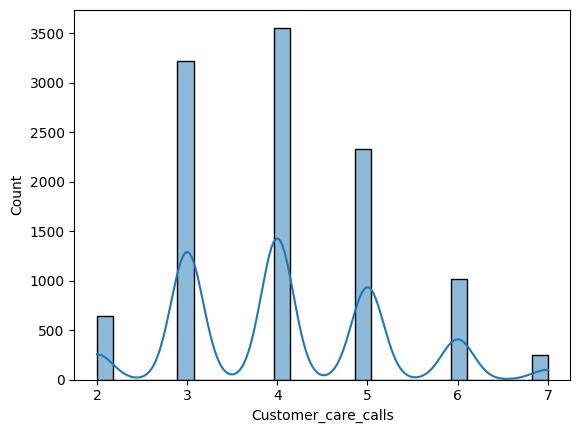

In [11]:
#Tổng quan về phân bố của dữ liệu ở cột "Customer_care_calls"
#Đường cong ước lượng mật độ xác suất của biến ngẫu nhiên tương ứng với giá trị số lần gọi đến bộ phận chăm sóc khách hàng
sns.histplot(data=dataSet, x='Customer_care_calls', kde=True)
plt.show()

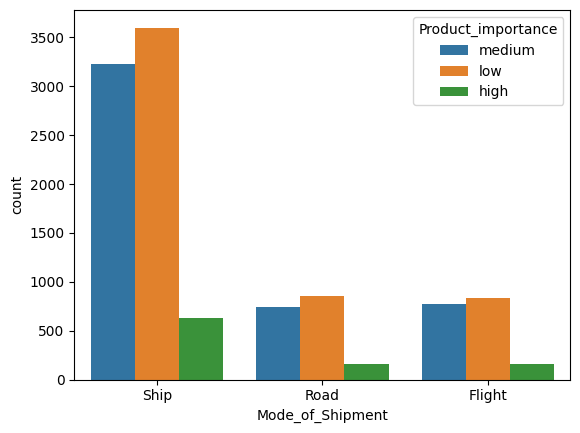

In [12]:
#Biểu đồ trực quan hóa phân bố của hai biến số "Mode_of_Shipment"(Phương thức vận chuyển) và "Product_importance"(Mực độ quan trọng của sản phẩm) trong dữ liệu
sns.countplot(data=dataSet, x='Mode_of_Shipment', hue='Product_importance')
plt.show()

<Axes: >

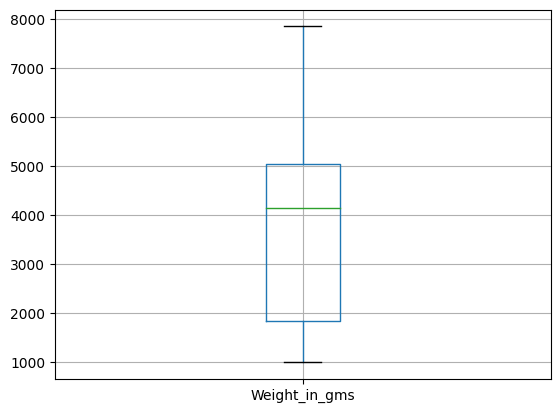

In [13]:
#Biểu đồ trực quan hóa phân bố của trọng lượng sản phẩn(Weight_in_gms) và tìm hiểu các giá trị ngoại lai (outliers) có xuất hiện trong dữ liệu hay không.
dataSet.boxplot(column=['Weight_in_gms'])

#Do không có dấu chấm ở ngoài nên không có outliers

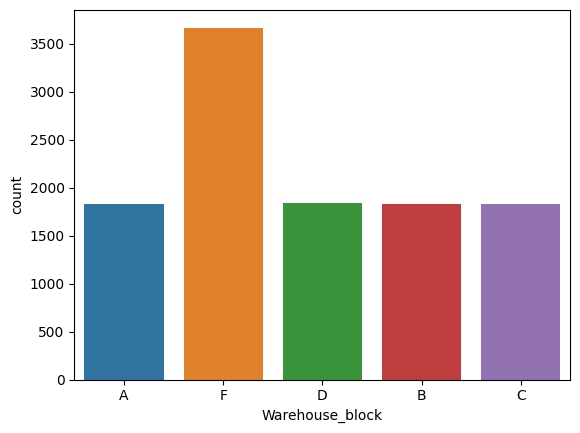

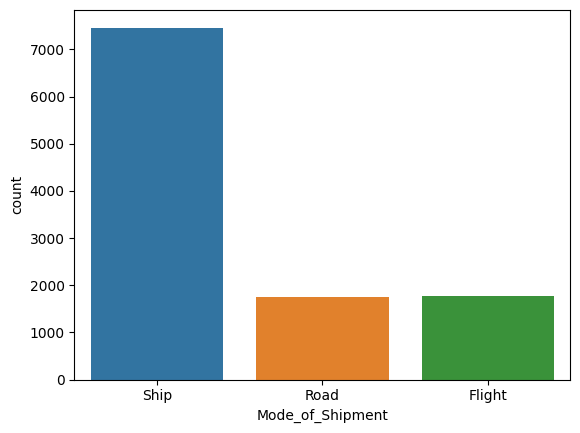

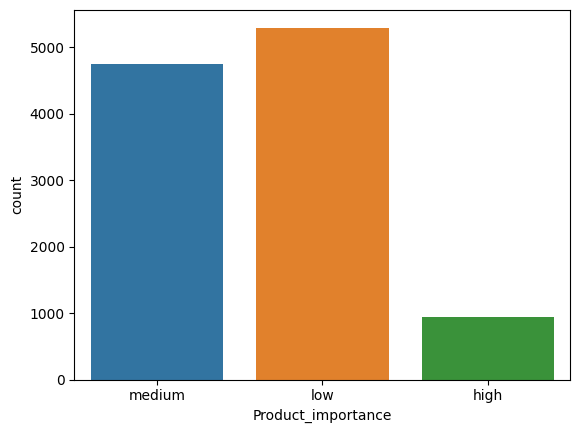

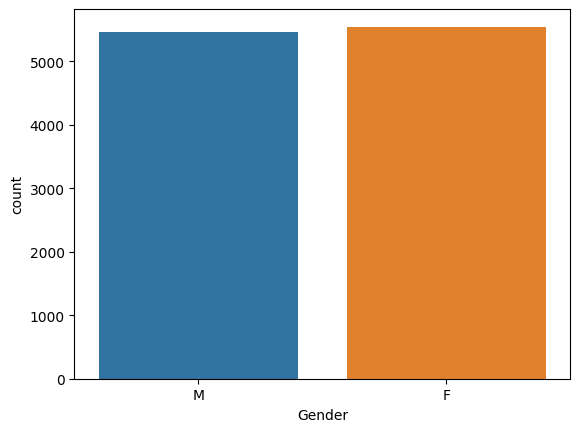

In [14]:
#Đồ thị biểu số lượng dữ liệu trong từng nhóm 'Warehouse_block'(Khu vực lưu trữ),'Mode_of_Shipment'(Phương thức giao hàng), 'Product_importance'(Mức độ quan trọng của sản phẩm), 'Gender'(Giới tính)
col_list = ['Warehouse_block',
       'Mode_of_Shipment', 'Product_importance', 'Gender']
for col_name in col_list:
    sns.countplot(data=dataSet, x=col_name)
    plt.show()

#5. ***Data Preprocessing***

#Tiền xử lý dữ liệu (Data Preprocessing)

Do không có dữ liệu null nên không cần xử lý"dữ liệu missing"

In [15]:
#Kiểm tra kiểu dữ liệu của các thuộc tính
dataSet.dtypes

Customer_care_calls     int64
Customer_rating         int64
Prior_purchases         int64
Discount_offered        int64
Weight_in_gms           int64
Warehouse_block        object
Mode_of_Shipment       object
Product_importance     object
Gender                 object
Class                   int64
dtype: object

Do 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender' có kiểu dữ liệu là object nên cần chuyển đổi để đồng bộ kiểu dữ liệu

In [16]:
#Lấy các thuộc tính có kiểu dữ liệu là object
categorical_features = dataSet.dtypes==object
data_types_object = dataSet.columns[categorical_features].tolist()
#Chuyển đổi
le = LabelEncoder()
for index in data_types_object:
    dataSet[index] = le.fit_transform(dataSet[index])

In [17]:
#Kiểm tra lại kiểu dữ liệu của các thuộc tính
dataSet.dtypes

Customer_care_calls    int64
Customer_rating        int64
Prior_purchases        int64
Discount_offered       int64
Weight_in_gms          int64
Warehouse_block        int64
Mode_of_Shipment       int64
Product_importance     int64
Gender                 int64
Class                  int64
dtype: object

In [18]:
dataSet.head()
#Đã chuyển đổi dữ liệu thành dạng integer

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,0,2,2,1,1
1,4,3,2,6,5867,4,2,2,0,0
2,3,4,2,2,5957,3,2,2,1,0
3,3,1,2,27,2551,3,2,2,1,1
4,7,5,4,9,1329,1,2,2,1,1


#6. ***Data Splitting***

#Tách dữ liệu (Data Splitting)

In [19]:
X = dataSet.drop(['Class'], axis=1)
y = dataSet.Class
#Chuẩn hóa StanderScaler cho dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
#Tách dữ liệu-Split, 70% để train, 30% để test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=32)

#7. ***Trainning models***

In [87]:
accuracy_test=[]
modelName = []



1.   DecisionTree



In [88]:
#Train DecisionTree
tree = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5) #Giới hạn độ sâu tối đa của cây quyết định là 3, số lượng mẫu tối thiểu ở mỗi lá của cây là 5
modelName.append(type(tree).__name__)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [89]:
#accuracy, precision, recall, f1
accuracy_score_tree = accuracy_score(y_test, y_pred_tree)
accuracy_test.append(accuracy_score_tree)
print("Accuracy_score:" + str(accuracy_score_tree))
precision_score_tree = precision_score(y_test, y_pred_tree, average='macro')
print("Precision_score:" + str(precision_score_tree))
recall_score_tree = recall_score(y_test, y_pred_tree, average='macro')
print("Recall_score:" + str(recall_score_tree))
f1_score_tree = f1_score(y_test, y_pred_tree, average='macro')
print("F1_score:" + str(f1_score_tree))

Accuracy_score:0.6587878787878788
Precision_score:0.665659648880894
Recall_score:0.6722232209284186
F1_score:0.6570338066939971


[[ 969  344]
 [ 782 1205]]


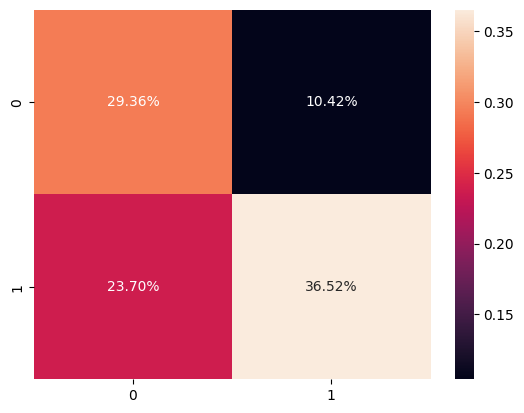

In [90]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_tree)
print(cf_matrix)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

2. RandomForest

In [91]:
#Train RandomForest
clf_randomforest=RandomForestClassifier(n_estimators=100) #sử dụng 100 cây quyết định trong mô hình Random Forest.
modelName.append(type(clf_randomforest).__name__)
clf_randomforest.fit(X_train,y_train)
y_pred_random = clf_randomforest.predict(X_test)

In [92]:
#accuracy, precision, recall, f1
accuracy_score_random = accuracy_score(y_test, y_pred_random)
accuracy_test.append(accuracy_score_random)
print("Accuracy_score:" + str(accuracy_score_random))
precision_score_random = precision_score(y_test, y_pred_random, average='macro')
print("Precision_score:" + str(precision_score_random))
recall_score_random = recall_score(y_test, y_pred_random, average='macro')
print("Recall_score:" + str(recall_score_random))
f1_score_random = f1_score(y_test, y_pred_random, average='macro')
print("F1_score:" + str(f1_score_random))

Accuracy_score:0.6521212121212121
Precision_score:0.6474633634996957
Recall_score:0.6535117256838145
F1_score:0.6464486775702278


[[ 867  446]
 [ 702 1285]]


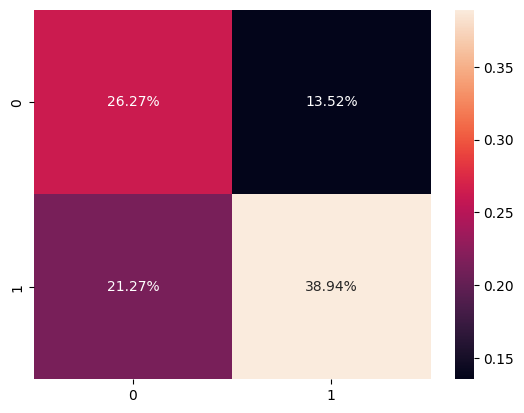

In [93]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_random)
print(cf_matrix)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

3. Naïve Bayes

In [94]:
#Train Naïve Bayes
model = GaussianNB()
modelName.append(type(model).__name__)
model.fit(X_train, y_train)
y_pred_bayes = model.predict(X_test)

In [95]:
#accuracy, precision, recall, f1
accuracy_score_bayes = accuracy_score(y_test, y_pred_bayes)
accuracy_test.append(accuracy_score_bayes)
print("Accuracy_score:" + str(accuracy_score_bayes))
precision_score_bayes = precision_score(y_test, y_pred_bayes, average='macro')
print("Precision_score:" + str(precision_score_bayes))
recall_score_bayes = recall_score(y_test, y_pred_bayes, average='macro')
print("Recall_score:" + str(recall_score_bayes))
f1_score_bayes = f1_score(y_test, y_pred_bayes, average='macro')
print("F1_score:" + str(f1_score_bayes))

Accuracy_score:0.6475757575757576
Precision_score:0.7460110908411298
Recall_score:0.7028267516465556
F1_score:0.6418011246319102


[[1278   35]
 [1128  859]]


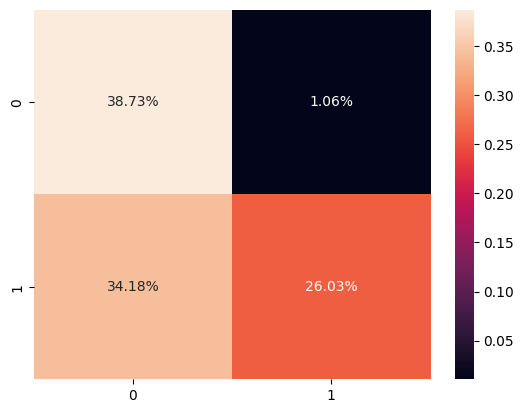

In [96]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_bayes)
print(cf_matrix)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

4. kNN

In [97]:
#Train kNN
knn = KNeighborsClassifier(n_neighbors=5) #Số lượng neighbors gần nhất là 5
modelName.append(type(knn).__name__)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [98]:
#accuracy, precision, recall, f1
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
accuracy_test.append(accuracy_score_knn)
print("Accuracy_score:" + str(accuracy_score_knn))
precision_score_knn = precision_score(y_test, y_pred_knn, average='macro')
print("Precision_score:" + str(precision_score_knn))
recall_score_knn = recall_score(y_test, y_pred_knn, average='macro')
print("Recall_score:" + str(recall_score_knn))
f1_score_knn = f1_score(y_test, y_pred_knn, average='macro')
print("F1_score:" + str(f1_score_knn))

Accuracy_score:0.6433333333333333
Precision_score:0.6329939000393545
Recall_score:0.6367847597349259
F1_score:0.6337059207687827


[[ 794  519]
 [ 658 1329]]


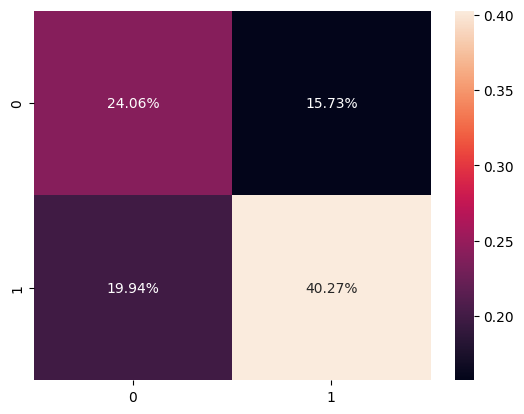

In [99]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print(cf_matrix)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

5. SVM

In [100]:
#Train SVM
clf = svm.SVC(kernel='linear') #sử dụng linear
modelName.append(type(clf).__name__)
clf.fit(X_train, y_train)
y_pred_SVM = clf.predict(X_test)

In [101]:
#accuracy, precision, recall, f1
accuracy_score_SVM = accuracy_score(y_test, y_pred_SVM)
accuracy_test.append(accuracy_score_SVM)
print("Accuracy_score:" + str(accuracy_score_SVM))
precision_score_SVM = precision_score(y_test, y_pred_SVM, average='macro')
print("Precision_score:" + str(precision_score_SVM))
recall_score_SVM = recall_score(y_test, y_pred_SVM, average='macro')
print("Recall_score:" + str(recall_score_SVM))
f1_score_SVM = f1_score(y_test, y_pred_SVM, average='macro')
print("F1_score:" + str(f1_score_SVM))

Accuracy_score:0.6542424242424243
Precision_score:0.6614693368111699
Recall_score:0.6678028280548624
F1_score:0.6525398696034813


[[ 964  349]
 [ 792 1195]]


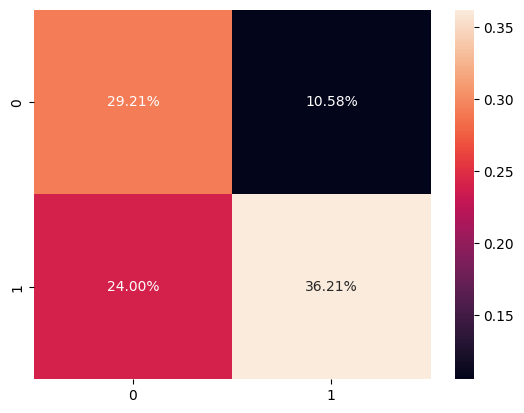

In [102]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
print(cf_matrix)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

6. Neural Network

In [103]:
#model
model_neural = Sequential()
modelName.append(type(model_neural).__name__)
#Lớp đầu tiên trong mô hình là Dense với 64 node và hàm kích hoạt relu kết nối với 9 thuộc tính của mẫu dữ liệu
model_neural.add(Dense(64, input_dim=9, activation='relu'))
#Lớp Dropout với giá trị 0.2 được thêm vào để giảm thiểu việc overfitting của mô hình
model_neural.add(Dropout(0.2))
#Lớp thứ hai trong mô hình là Dense với 32 node và hàm kích hoạt relu
model_neural.add(Dense(32, activation='relu'))
#Lớp Dropout với giá trị 0.2 được thêm vào để giảm thiểu việc overfitting của mô hình
model_neural.add(Dropout(0.2))
#Lớp thứ ba trong mô hình là Dense với 16 node và hàm kích hoạt relu
model_neural.add(Dense(16, activation='relu'))
#Lớp Dropout với giá trị 0.2 được thêm vào để giảm thiểu việc overfitting của mô hình
model_neural.add(Dropout(0.2))
#lớp Dense cuối cùng có 1 node và hàm kích hoạt sigmoid được sử dụng để đưa ra dự đoán cho mô hình. Sử dụng để phân loại các mẫu dữ liệu vào hai lớp 0 và 1
model_neural.add(Dense(1, activation='sigmoid'))

In [104]:
#complite
model_neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
#Train
model_neural.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
241/241 [==============================] - 3s 4ms/step - loss: 0.6127 - accuracy: 0.6081 - val_loss: 0.5389 - val_accuracy: 0.6533
Epoch 2/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5457 - accuracy: 0.6503 - val_loss: 0.5253 - val_accuracy: 0.6688
Epoch 3/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5333 - accuracy: 0.6581 - val_loss: 0.5247 - val_accuracy: 0.6579
Epoch 4/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.6586 - val_loss: 0.5228 - val_accuracy: 0.6548
Epoch 5/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.6603 - val_loss: 0.5235 - val_accuracy: 0.6594
Epoch 6/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5239 - accuracy: 0.6669 - val_loss: 0.5220 - val_accuracy: 0.6585
Epoch 7/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5208 - accuracy: 0.6611 - val_loss: 0.5221 - val_accuracy: 0.6682
Epoch 

In [106]:
#Lose and accuracy of test
score = model_neural.evaluate(X_test, y_test)
print(score)

104/104 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.6776
[0.5137423276901245, 0.6775757670402527]


In [107]:
y_pred = model_neural.predict(X_test)
y_pred_rounded = np.round(y_pred)
#accuracy, precision, recall, f1
accuracy_score_neural = accuracy_score(y_test, y_pred_rounded)
accuracy_test.append(accuracy_score_neural)
print("Accuracy_score:" + str(accuracy_score_neural))
precision_score_neural = precision_score(y_test, y_pred_rounded, average='macro')
print("Precision_score:" + str(precision_score_neural))
recall_score_neural = recall_score(y_test, y_pred_rounded, average='macro')
print("Recall_score:" + str(recall_score_neural))
f1_score_neural = f1_score(y_test, y_pred_rounded, average='macro')
print("F1_score:" + str(f1_score_neural))

104/104 [==============================] - 0s 2ms/step
Accuracy_score:0.6775757575757576
Precision_score:0.7393219030689593
Recall_score:0.7212800951807464
F1_score:0.6761363636363635


[[1228   85]
 [ 979 1008]]


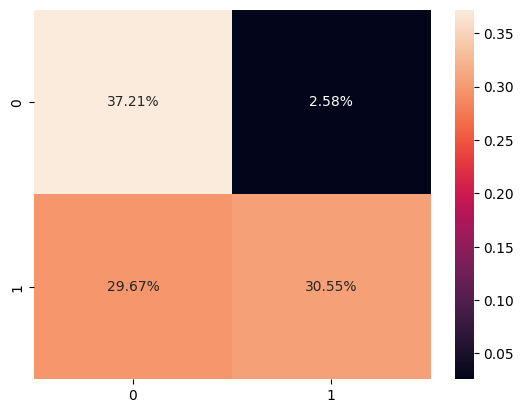

In [108]:
cm = confusion_matrix(y_test, y_pred_rounded)
print(cm)
#Vẽ biểu đồ hiển thị ma trận
plot_ = sns.heatmap(cm/np.sum(cm), annot=True,fmt= '0.2%')
plt.show()

#8. ***Comparisons and statistics***

#So sánh kết quả thuật toán dựa trên các metrics

Bảng so sánh các thuật toán

In [109]:
#Show table models
t = PrettyTable([' ', 'accuracy','precision','recall','f1_score'])
#To insert rows
t.add_row(['DecisionTree',accuracy_score_tree, precision_score_tree, recall_score_tree, f1_score_tree])
t.add_row(['RandomForest', accuracy_score_random, precision_score_random, recall_score_random, f1_score_random])
t.add_row(['Naïve Bayes', accuracy_score_bayes, precision_score_bayes, recall_score_bayes, f1_score_bayes])
t.add_row(['kNN', accuracy_score_knn, precision_score_knn, recall_score_knn, f1_score_knn])
t.add_row(['SVM', accuracy_score_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM])
t.add_row(['Neural Network', accuracy_score_neural, precision_score_neural, recall_score_neural, f1_score_neural])
print(t)

+----------------+--------------------+--------------------+--------------------+--------------------+
|                |      accuracy      |     precision      |       recall       |      f1_score      |
+----------------+--------------------+--------------------+--------------------+--------------------+
|  DecisionTree  | 0.6587878787878788 | 0.665659648880894  | 0.6722232209284186 | 0.6570338066939971 |
|  RandomForest  | 0.6521212121212121 | 0.6474633634996957 | 0.6535117256838145 | 0.6464486775702278 |
|  Naïve Bayes   | 0.6475757575757576 | 0.7460110908411298 | 0.7028267516465556 | 0.6418011246319102 |
|      kNN       | 0.6433333333333333 | 0.6329939000393545 | 0.6367847597349259 | 0.6337059207687827 |
|      SVM       | 0.6542424242424243 | 0.6614693368111699 | 0.6678028280548624 | 0.6525398696034813 |
| Neural Network | 0.6775757575757576 | 0.7393219030689593 | 0.7212800951807464 | 0.6761363636363635 |
+----------------+--------------------+--------------------+-------------

In [110]:
model_Name = pd.Series(modelName, name='Model').astype(str)
acc_test = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model_Name, acc_test],axis=1)

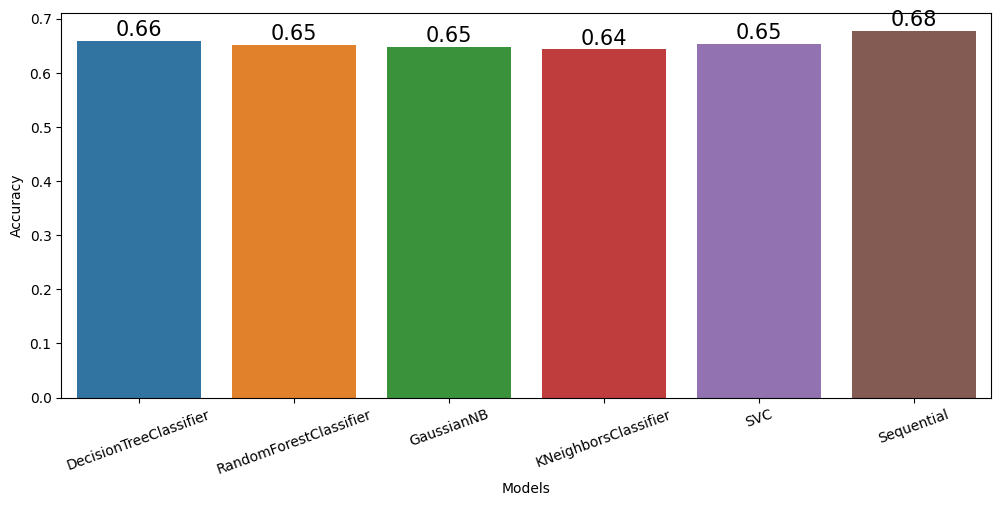

In [111]:
#Biểu đồ thống kê Accuracy của các model
plt.figure(figsize=(12, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);